In [1]:
import numpy as np
from numpy.random import randn 
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

Defining a kernel and GP:

In [2]:
def kernel (f) : return lambda a,b : np.array([ [np.float64(f(a[i],b[j])) for j in range(b.size) ] for i in range(a.size) ])

SE  = lambda a,b : np.exp(-(a-b)**2 / 2.0)

# define the GP:
m   = lambda x : 0.0 * x   # mean function
k   = kernel(SE) 

Drawing samples:

In [3]:
n        = 100
X        = np.linspace(-8,8,n).reshape(n,1)
kXX      = k(X,X)
mX       = m(X)
samples  = cholesky(kXX + 1e-8 * np.eye(n)) @ randn(n,3) + mX

plotting:

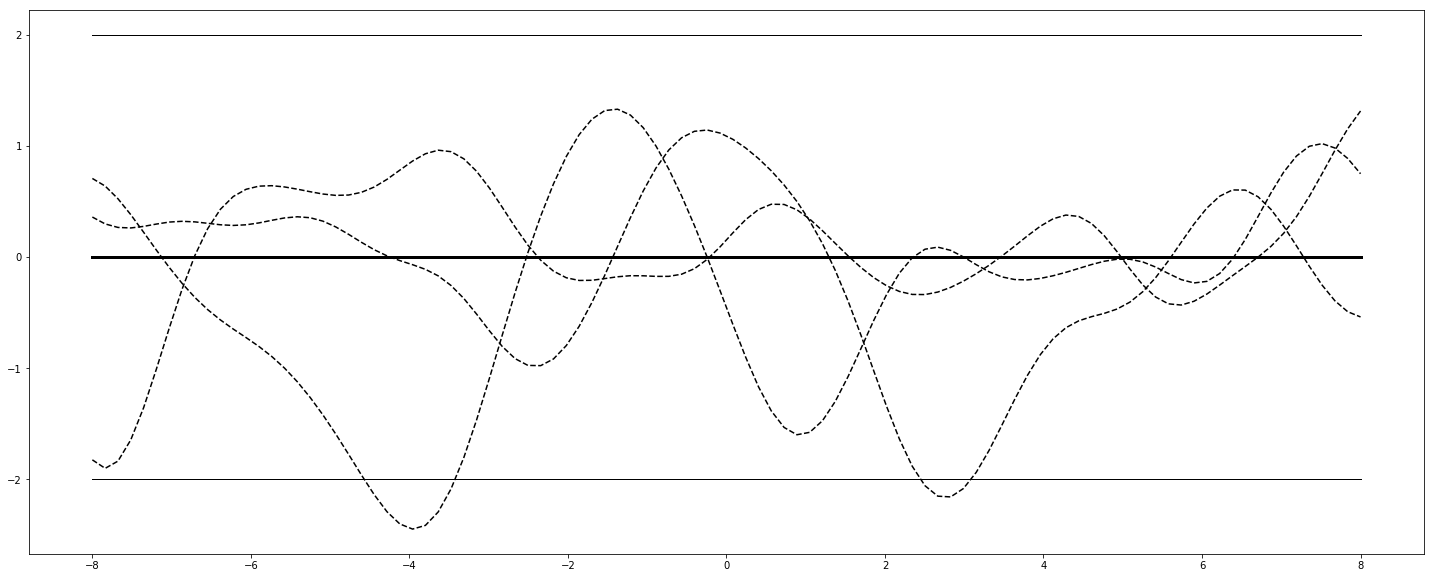

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 10)

plt.plot(X,mX,'-k',linewidth=3)    # prior mean
plt.plot(X,mX + 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,mX - 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,samples,'--k')  # samples
plt.show()

### Exercise 3a)

We change the kernel to the *rational quadratic kernel*

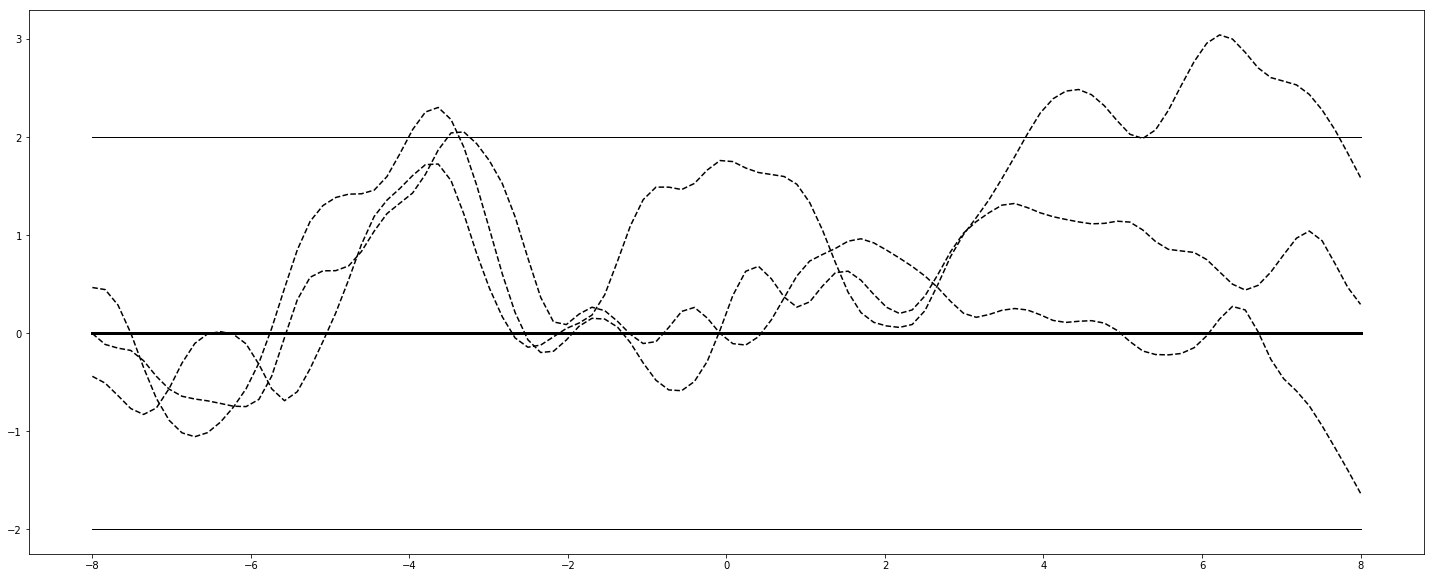

In [5]:
# Define the kernel. This is the only new thing!
RQ  = lambda a,b : (1+(a-b)**2)**-0.5
# define the GP:
m   = lambda x : 0.0 * x   # mean function
k   = kernel(RQ) 
# Drawing Samples
kXX      = k(X,X)
mX       = m(X)
samples  = cholesky(kXX + 1e-8 * np.eye(n)) @ randn(n,3) + mX
# Plotting 
plt.rcParams['figure.figsize'] = (25, 10)

plt.plot(X,mX,'-k',linewidth=3)    # prior mean
plt.plot(X,mX + 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,mX - 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,samples,'--k')  # samples
plt.show()

### Exercise 3b)

We change the mean function from  a zero mean to x^2

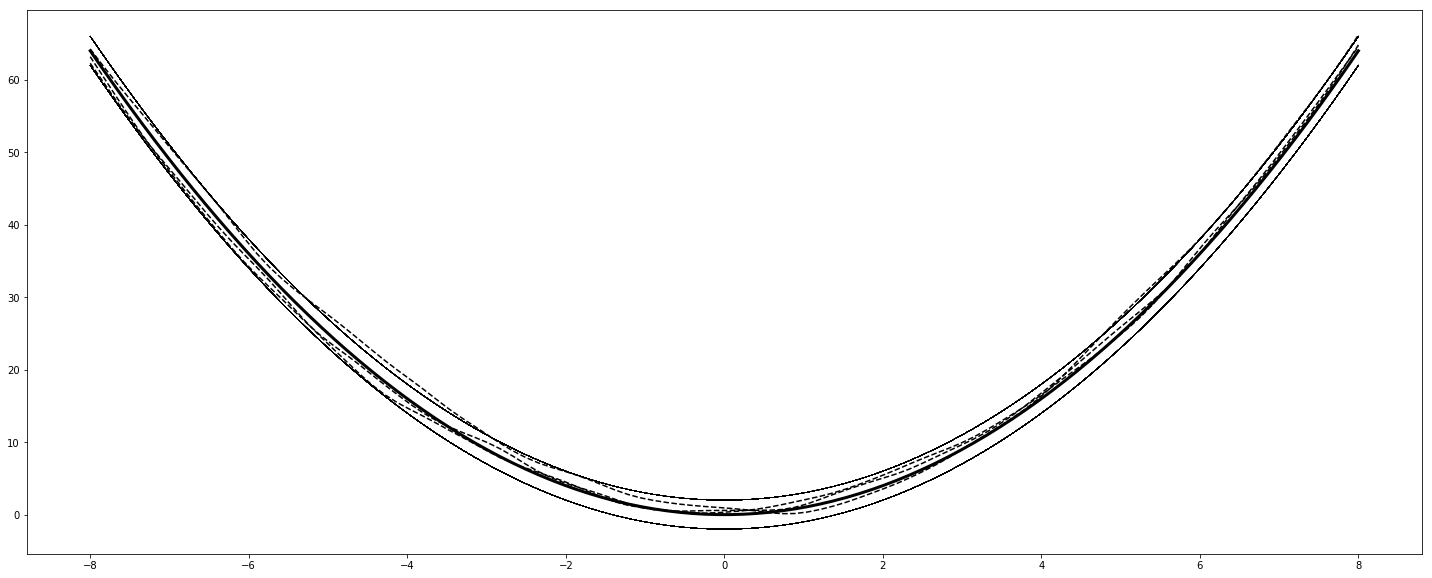

In [6]:
# Define the mean. This is the only new thing!
m   = lambda x : x**2   # mean function
# Drawing Samples
kXX      = k(X,X)
mX       = m(X)
samples  = cholesky(kXX + 1e-8 * np.eye(n)) @ randn(n,3) + mX
# Plotting 
plt.rcParams['figure.figsize'] = (25, 10)

plt.plot(X,mX,'-k',linewidth=3)    # prior mean
plt.plot(X,mX + 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,mX - 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,samples,'--k')  # samples
plt.show()

### Exercise 3c)

We change the hyperparameter of the kernel

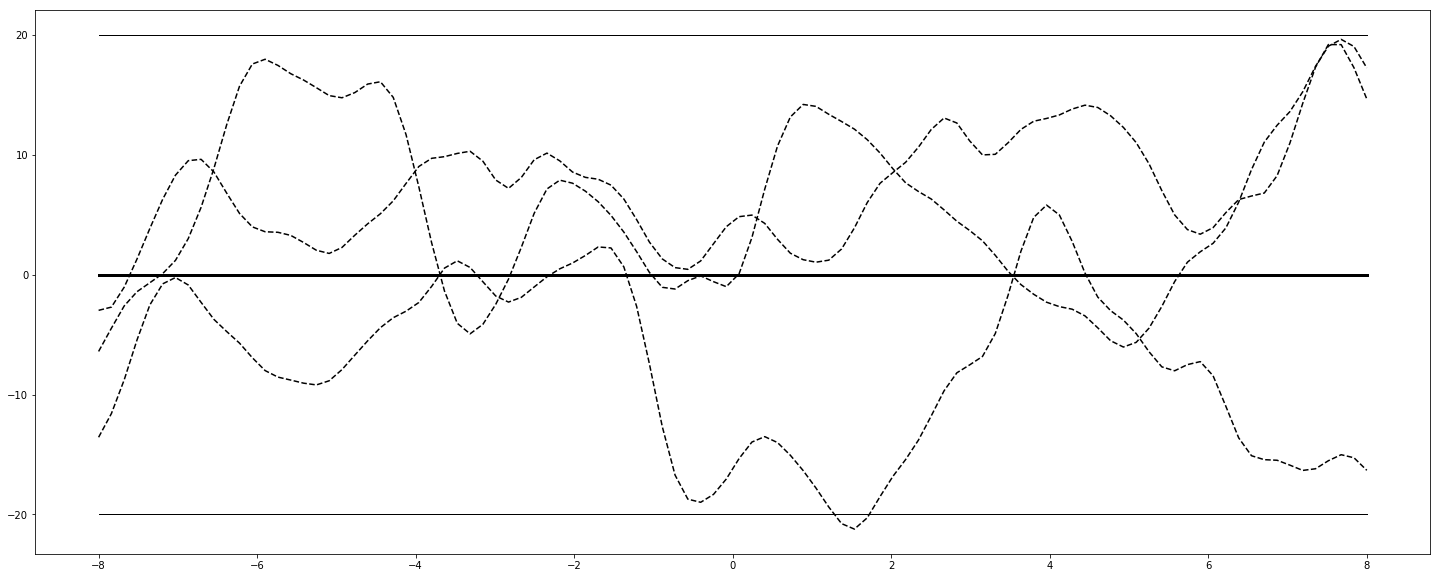

In [7]:
# Define the kernel. This is the only new thing!
RQ  = lambda a,b : 100 * (1+(a-b)**2)**-0.5
# define the GP:
m   = lambda x : 0.0 * x   # mean function
k   = kernel(RQ) 
# Drawing Samples
kXX      = k(X,X)
mX       = m(X)
samples  = cholesky(kXX + 1e-8 * np.eye(n)) @ randn(n,3) + mX
# Plotting 
plt.rcParams['figure.figsize'] = (25, 10)

plt.plot(X,mX,'-k',linewidth=3)    # prior mean
plt.plot(X,mX + 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,mX - 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,samples,'--k')  # samples
plt.show()

### Exercise 3d)

We change the kernel to involve inner functions

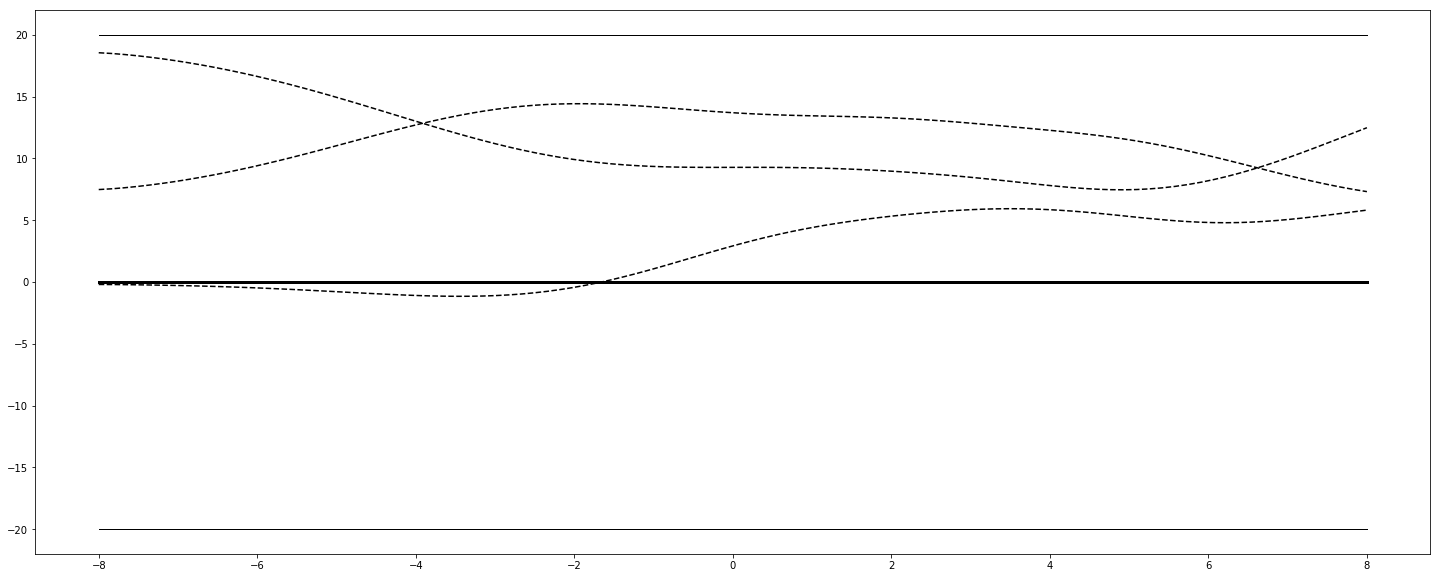

In [8]:
# Define the kernel. Add a function phi and include it in the RQ kernel. This is the only new thing!
phi = lambda x : ((x + 8.1)/10.0)**(3.0/2.0)
RQ  = lambda a,b : 100 * (1+(phi(a)-phi(b))**2)**-0.5
# define the GP:
m   = lambda x : 0.0 * x   # mean function
k   = kernel(RQ) 
# Drawing Samples
kXX      = k(X,X)
mX       = m(X)
samples  = cholesky(kXX + 1e-8 * np.eye(n)) @ randn(n,3) + mX
# Plotting 
plt.rcParams['figure.figsize'] = (25, 10)

plt.plot(X,mX,'-k',linewidth=3)    # prior mean
plt.plot(X,mX + 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,mX - 2*np.sqrt(np.diag(kXX)),'-k',linewidth=0.5)
plt.plot(X,samples,'--k')  # samples
plt.show()

### Exercise 3e)

We draw 10^4 sample function and compute the empirical covariance matrix. 

In [9]:
# Compute 10**4 samples
samples  = cholesky(kXX + 1e-8 * np.eye(n)) @ randn(n,10**4) + mX
# compute the empericial covariance matrix between function values, using those samples.
emp_cov = np.cov(samples)

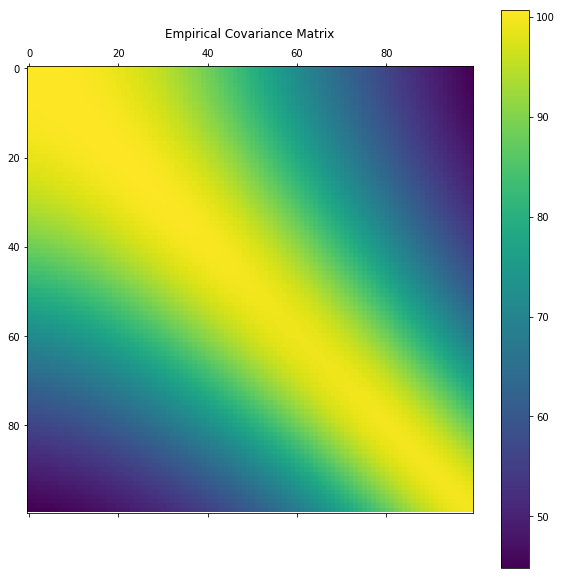

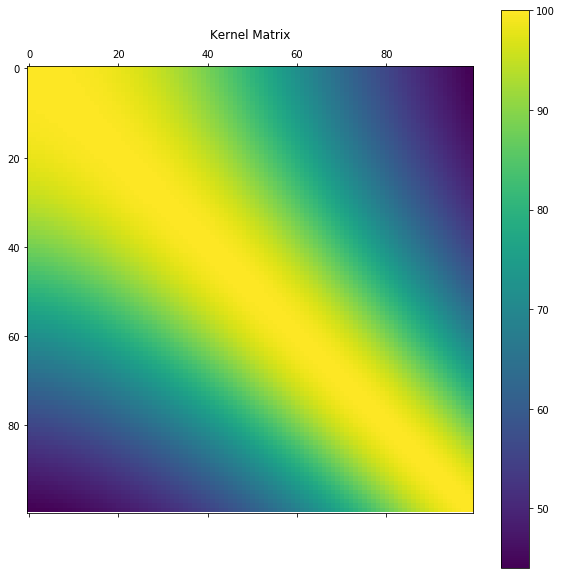

In [10]:
# Plot both empirical covariance matrix and the kernel
# Plot empirical covariance matrix, and plot colorbar
plt.matshow(emp_cov)
plt.colorbar()
plt.title('Empirical Covariance Matrix')
plt.show()
# Plot kernel matrix, and plot colorbar
plt.matshow(kXX)
plt.colorbar()
plt.title('Kernel Matrix')
plt.show()

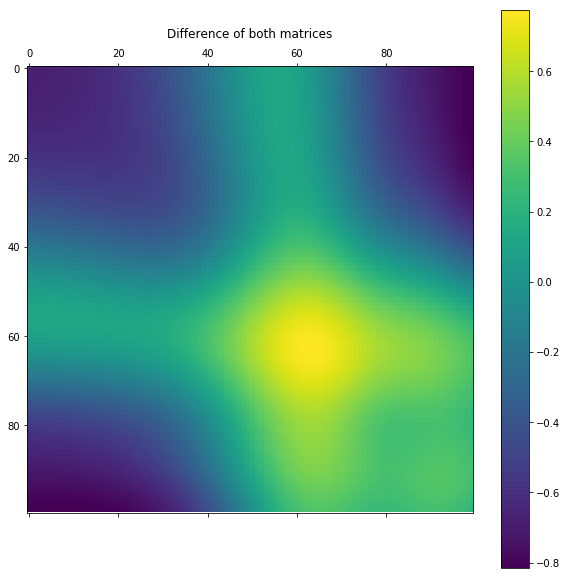

In [11]:
plt.matshow(kXX - emp_cov)
plt.colorbar()
plt.title('Difference of both matrices')
plt.show()

Both matrices look very similar, as the empirical covariance matrix is an (empericial) approximation to the kernel matrix. Both describe the covariance of the function values at two points. Since we use 10^4 samples to compute the empirical covariance matrix, this generates a very close approximation to the kernel matrix. If we use less samples, the difference between the two matrices is more visible and the empericial covariance matrix would look different, each time we generate new samples.